# Análisis de Ventas y Tendencias en la Industria de Videojuegos (2016)

# Tabla de Contenidos
1. [Introducción](#first-bullet)
2. [Importación de librerias](#encabezado-2)
3. [Preprocesamiento de los datos](#encabezado-3)

## Introducción <a class="anchor" id="first-bullet"></a>
La tienda online Ice, dedicada a la venta de videojuegos a nivel mundial, busca optimizar sus campañas publicitarias e identificar títulos con alto potencial de éxito. Para ello, se ha realizado un análisis exhaustivo de un conjunto de datos históricos que abarca desde el año 1980 hasta 2016, con especial enfoque en los últimos años, donde se concentran los títulos más relevantes para el mercado actual.

El presente proyecto simula estar en diciembre de 2016 con el objetivo de planificar de forma estratégica las campañas de 2017. A través del análisis de ventas, plataformas, géneros, calificaciones de usuarios y expertos, así como factores regionales y clasificaciones ESRB, se identifican patrones y tendencias que determinan el éxito de un videojuego en distintas regiones del mundo.

### 🎯 Objetivos del Proyecto

1. **Preparar y depurar los datos** para asegurar su calidad, estandarización y coherencia para el análisis.  
2. **Analizar el comportamiento histórico de las ventas** por plataforma, género y región, enfocándose en las tendencias recientes que puedan influir en la planificación de 2017.  
3. **Explorar el impacto de las reseñas y calificaciones** (de críticos y usuarios) en las ventas globales y regionales de los videojuegos.  
4. **Identificar plataformas y géneros prometedores**, destacando los más rentables y con mayor crecimiento.  
5. **Desarrollar perfiles de usuario regionales** (Norteamérica, Europa y Japón) para entender las preferencias específicas por plataforma, género y clasificación ESRB.  
6. **Probar hipótesis estadísticas** relacionadas con las calificaciones de usuarios entre plataformas y géneros, aplicando pruebas de significancia para obtener conclusiones objetivas.  
7. **Extraer conclusiones accionables** que permitan recomendar estrategias de marketing y selección de productos para el año siguiente.

## Importación de librerias <a class="anchor" id="encabezado-2"></a>
Al inicio del presente proyecto se importaron las librerias que se utilizaran a lo largo del proyecto, en esta primera etapa también se visualizaron los primeros datos del DF para analizar sus filas y columnas 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, levene
# se importan las librerias que se pretenden utilizar

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Preprocesamiento de los datos <a class="anchor" id="encabezado-3"></a>
Después de obdervar los datos se comienza a realizar unos cambios, lo primero que se realizo fue estandarizar los nombres de columnas y con un ciclo for todas se pusieron en minúsculas, además de un analisis realizado más adelante se eliminaron los datos de antes de 1993 ya que para el presente estudio no se consideraron relevantes ya que las plataformas de ese año ya no existen en la actualidad

In [4]:
new_columns = {col: col.lower() for col in games.columns}

games.rename(columns=new_columns, inplace=True)

print(games.head()) #se reemplezaron los nombres de las columnas con un ciclo y se pusieron en minusculas 

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [5]:
games['year_date'] = pd.to_datetime(games['year_of_release'], format='%Y') #agregamos un nueva columna con el formato de fecha 

In [6]:
games.dtypes

name                       object
platform                   object
year_of_release           float64
genre                      object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                 object
rating                     object
year_date          datetime64[ns]
dtype: object

In [7]:
games = games.loc[games['year_of_release'] >= 1993]

In [8]:
games['user_score'].value_counts().sort_index()

0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       5
9.6       2
9.7       1
tbd    2376
Name: user_score, Length: 96, dtype: int64

### Reemplazo de datos  
se reemplaza el tbd por -1, al saber el signicado de tbd entendemos que no se puede colocar un 0 ya que eso significaria que lo calificaron mal es por eso que mejor se reemplaza con -1 para que sea un valor no sigficativo 

In [9]:
games['user_score_fixed'] = np.where(
   games['user_score'] == 'tbd',
         np.nan,
   games['user_score']
)
games['user_score_fixed'] = games['user_score_fixed'].astype('float')

games[['critic_score', 'user_score_fixed']].describe() 

,critic_score,user_score_fixed
count,7980.000000,7460.000000
mean,68.994236,7.127024
std,13.920962,1.498533
min,13.000000,0.000000
25%,60.000000,6.400000
50%,71.000000,7.500000
75%,79.000000,8.200000
max,98.000000,9.700000


In [10]:
games = games.dropna(subset=['genre'])

In [11]:
median_scores = games.groupby('platform')['user_score_fixed'].transform('median')

games['user_score_fixed'] = games['user_score_fixed'].fillna(median_scores)

print(games['user_score_fixed'].isnull().sum())

800


In [12]:
# Eliminar las filas con NaN en 'user_score_fixed'
games = games.dropna(subset=['user_score_fixed'])

# Verificar que no haya más valores nulos en 'user_score_fixed'
print(games['user_score_fixed'].isnull().sum())

0


Se llenaron los datos donde se les asigno la mediana de la plataforma a dichos valores sin embago, aun teniamos valores nulos por lo que esos 800 se decidio eliminarlas ya que en su mayoria eran juegos de los 2000 o antes que para el siguiente estudios no son relevantes. 

In [13]:
games.isna().sum()

name                   0
platform               0
year_of_release        0
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        7359
user_score          5503
rating              5575
year_date              0
user_score_fixed       0
dtype: int64

<AxesSubplot:xlabel='year_date'>

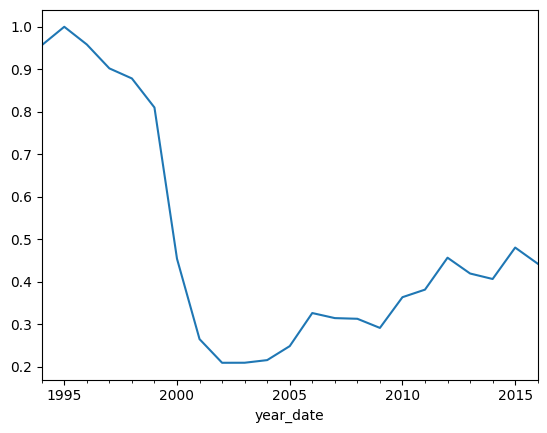

In [14]:
games["rating"].isna().groupby(games["year_date"]).mean().plot(kind="line")  

Se agrega la columna de ventas totales y anteriormente se hizo una grafica para determinar en que tanto afecta eliminar los datos de una columna o ponerle 0 

In [15]:
games['total_sales'] = games['eu_sales'] + games['jp_sales'] + games['other_sales'] + games['na_sales']

In [16]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_date,user_score_fixed,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006-01-01,8.0,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008-01-01,8.3,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009-01-01,8.0,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,2006-01-01,8.5,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,2006-01-01,6.6,28.91


## Analisis de datos 

<AxesSubplot:xlabel='year_date'>

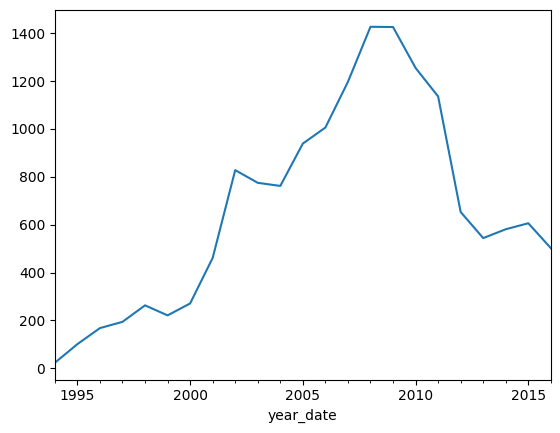

In [17]:
games.groupby('year_date')['name'].count().plot(kind='line')

Se observa que de 1993 hasta el 2009 el aumento en el lanzamiento de juegos fue constante dicho aumento y tuvo su mayor aumento justamente en el 2009, sin embargo, del 2009 en adelante fue disminuyendo la salida de juegos por lo que se podria hablar de dos peridos distintos 

In [18]:
games.query("year_date <= '1993-01-01'").shape

(0, 14)

<AxesSubplot:xlabel='year_date'>

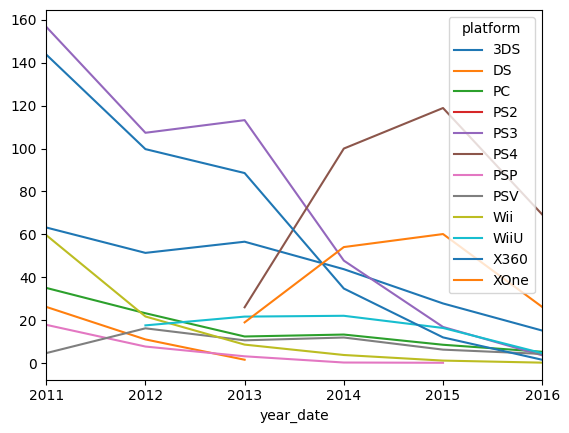

In [19]:
filtered_games = games[games['year_date'] >= '2011-01-01']

filtered_games.pivot_table(index='year_date', columns='platform', values='total_sales', aggfunc='sum').plot(kind='line')



In [20]:
# XBox: XB, X360, XOne

# PS: PS, PS2, PS3, PS4

# PS portátil: PSP, PSV

# Nintendo: NES, SNES, N64, GC, Wii, WiiU

# Nintendo portátil: GB, GC, GBA, DS, 3DS

<AxesSubplot:xlabel='year_date'>

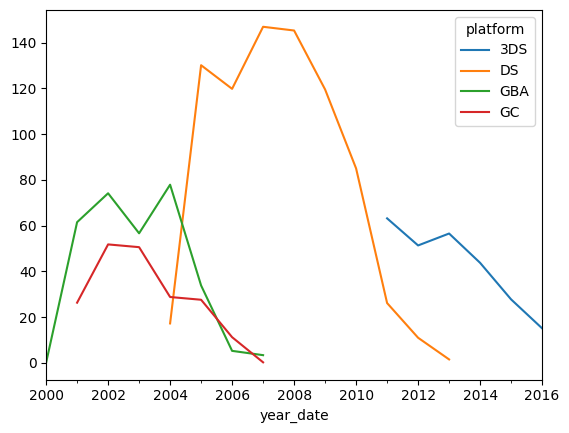

In [21]:
nintendo_portatil_platforms = ['GB', 'GC', 'GBA', 'DS', '3DS']
games[games['platform'].isin(nintendo_portatil_platforms)].pivot_table(index='year_date', 
                                                             columns='platform', 
                                                             values='total_sales', 
                                                             aggfunc='sum').plot(kind='line')

<AxesSubplot:xlabel='year_date'>

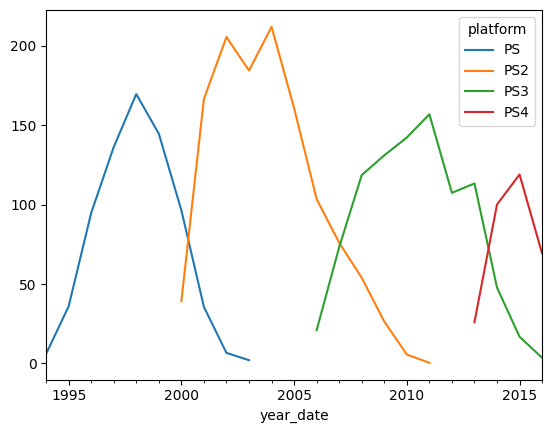

In [22]:
ps_platforms = ['PS', 'PS2', 'PS3', 'PS4']
games[games['platform'].isin(ps_platforms)].pivot_table(index='year_date', 
                                                             columns='platform', 
                                                             values='total_sales', 
                                                             aggfunc='sum').plot(kind='line')

<AxesSubplot:xlabel='year_date'>

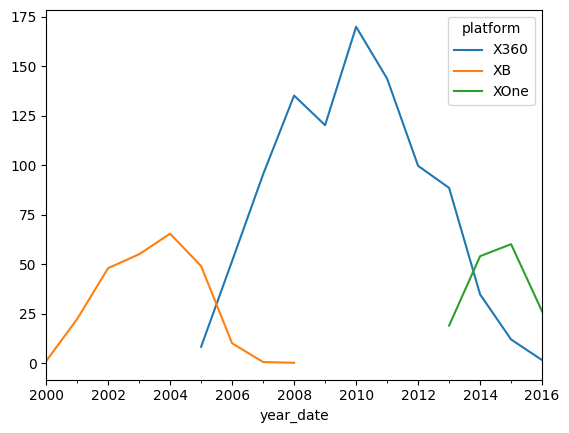

In [23]:
xbox_platforms = ['XB', 'X360', 'XOne']
games[games['platform'].isin(xbox_platforms)].pivot_table(index='year_date', 
                                                             columns='platform', 
                                                             values='total_sales', 
                                                             aggfunc='sum').plot(kind='line')

<AxesSubplot:xlabel='year_date'>

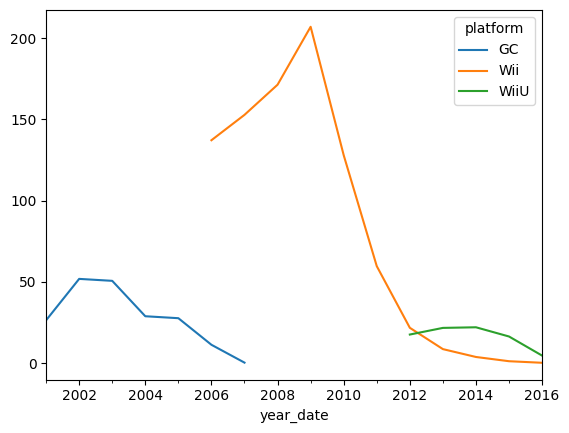

In [24]:
nintendo_platforms = ['NES', 'SNES', 'N64', 'GC', 'Wii', 'WiiU']

games[games['platform'].isin(nintendo_platforms)].pivot_table(index='year_date', 
                                                             columns='platform', 
                                                             values='total_sales', 
                                                             aggfunc='sum').plot(kind='line')

En las graficas mostradas anteriormente se pueden resolver ciertas dudas:
- Las nuevas plataformas se tardan por lo regular de 5 a 6 años en aparecer 
- las antiguas plataformas tardan por lo regular de 6 hasta 10 años 

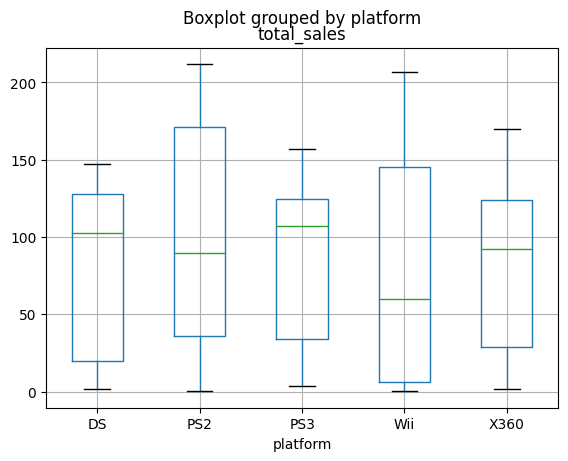

In [25]:
top5_platforms = list(games.groupby('platform')['total_sales'].sum().sort_values().tail().index)

filtered_games = games.query("year_date > '1993-01-01'")
sales_by_year = filtered_games.groupby(['year_date', 'platform'])['total_sales'].sum().reset_index()

sales_by_year[sales_by_year['platform'].isin(top5_platforms)][['total_sales', 'platform']].boxplot(
    column='total_sales',
    by='platform'
)
#plt.ylim(0, 5)
plt.show()

En la grafica anterior muestra la distribución basada en las ventas de los datos de cada año de las 5 plataformas con mayores ventas.

<AxesSubplot:xlabel='year_date'>

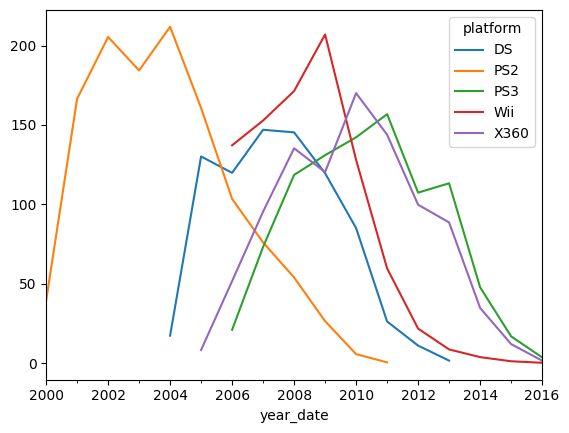

In [26]:
top5_platforms = list(games.groupby('platform')['total_sales'].sum().sort_values().tail().index)

(
    games[games['platform'].isin(top5_platforms)]
    .pivot_table(index='year_date', 
                 columns='platform', 
                 values='total_sales',
                 aggfunc='sum')
    .plot(kind='line')
)

<AxesSubplot:xlabel='year_date'>

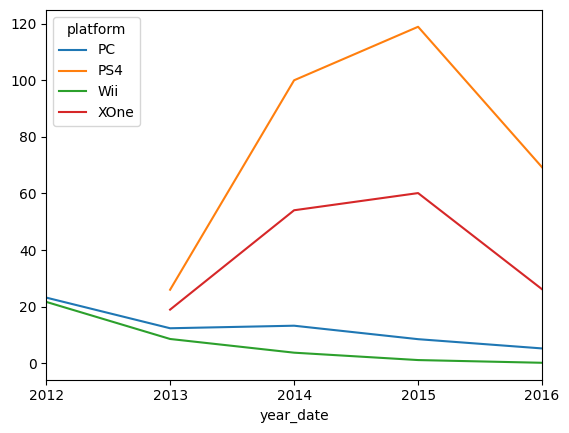

In [27]:
new_platforms = ['XOne', 'PC', 'PS4', 'Wii']

games[(games['platform'].isin(new_platforms)) & (games['year_of_release'] >= 2012)].pivot_table(index='year_date', 
                                                             columns='platform', 
                                                             values='total_sales', 
                                                             aggfunc='sum').plot(kind='line')

In [28]:
games.groupby('platform')['year_date'].nunique().sort_values(ascending=False)

platform
PC      23
PS2     12
PSP     12
X360    12
PS3     11
Wii     11
DS      10
PS      10
XB       9
GBA      8
GC       7
DC       7
3DS      6
PSV      6
WiiU     5
PS4      4
XOne     4
Name: year_date, dtype: int64

Se determino que las plataformas más rentables son las que tienen ventas hoy en dia y que por ejemplo en el caso de la PC aunque no sea lider en ventas actualmente es la plataforma que conserva sus ventas a lo largo de los años y se determinaron las plataformas con ventas con 6 años antes.
**La PC se considera como una plataforma potencialmente rentable**

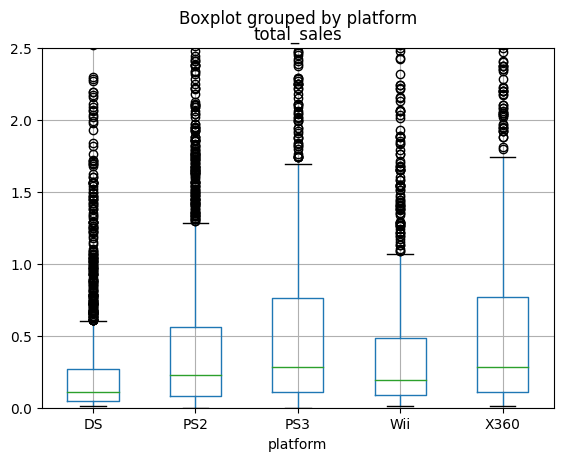

In [29]:
filtered_games[filtered_games['platform'].isin(top5_platforms)].boxplot(
    column='total_sales',
    by='platform'
)
plt.ylim(0, 2.5)
plt.show()

<AxesSubplot:xlabel='platform'>

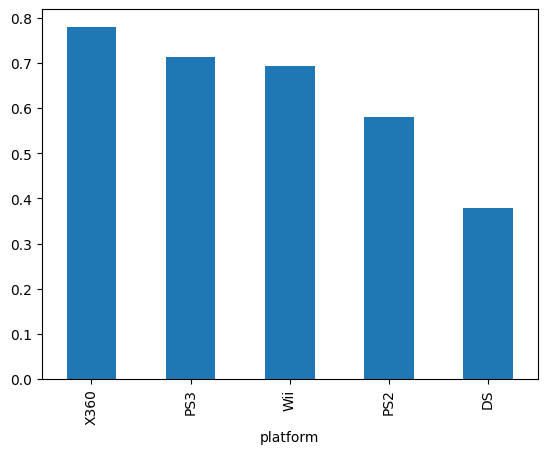

In [30]:
(
    filtered_games[filtered_games['platform'].isin(top5_platforms)]
    .groupby('platform')['total_sales']
    .mean()
    .sort_values(ascending=False)
    .plot(kind="bar")
)

En promedio un juego en 360 se vende mucho más que un juego en DS y que PS2, también influye cuantos videojuegos se lanzaron para cada plataforma, además derivado de los diagramas de caja podemos observar que un 25% de los ventas en las plataformas de PS3 y X360 son más altos que comparado con la demás plataformas

In [31]:
filtered_games.query("platform == 'PC'")[["total_sales", "critic_score"]].corr()

,total_sales,critic_score
total_sales,1.000000,0.257359
critic_score,0.257359,1.000000


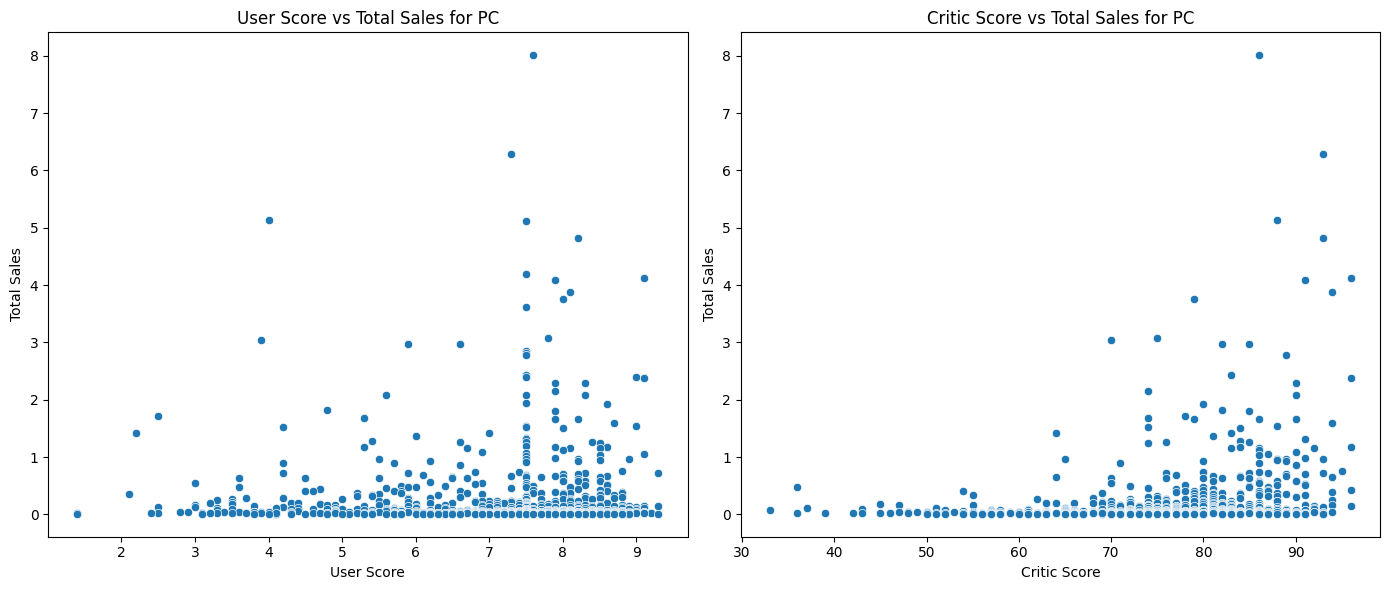

Correlation between User Score and Total Sales for PC: 0.01
Correlation between Critic Score and Total Sales for PC: 0.26
There is a weak or no correlation between User Score and Total Sales for PC.
There is a weak or no correlation between Critic Score and Total Sales for PC.


In [32]:
pc_games = games[games['platform'] == 'PC']

# Crear gráficos de dispersión
plt.figure(figsize=(14, 6))

# Gráfico de dispersión para user_score_fixed vs total_sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score_fixed', y='total_sales', data=pc_games)
plt.title('User Score vs Total Sales for PC')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

# Gráfico de dispersión para critic_score vs total_sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=pc_games)
plt.title('Critic Score vs Total Sales for PC')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

# Calcular la correlación
user_score_correlation = pc_games['user_score_fixed'].corr(pc_games['total_sales'])
critic_score_correlation = pc_games['critic_score'].corr(pc_games['total_sales'])

print(f"Correlation between User Score and Total Sales for PC: {user_score_correlation:.2f}")
print(f"Correlation between Critic Score and Total Sales for PC: {critic_score_correlation:.2f}")

if user_score_correlation > 0.5:
    print("There is a strong positive correlation between User Score and Total Sales for PC.")
elif user_score_correlation > 0.3:
    print("There is a moderate positive correlation between User Score and Total Sales for PC.")
else:
    print("There is a weak or no correlation between User Score and Total Sales for PC.")

if critic_score_correlation > 0.5:
    print("There is a strong positive correlation between Critic Score and Total Sales for PC.")
elif critic_score_correlation > 0.3:
    print("There is a moderate positive correlation between Critic Score and Total Sales for PC.")
else:
    print("There is a weak or no correlation between Critic Score and Total Sales for PC.")

No se considera una correlación de las ventas de los juegos de PC ni con las criticas de usuarios ni con el critic score

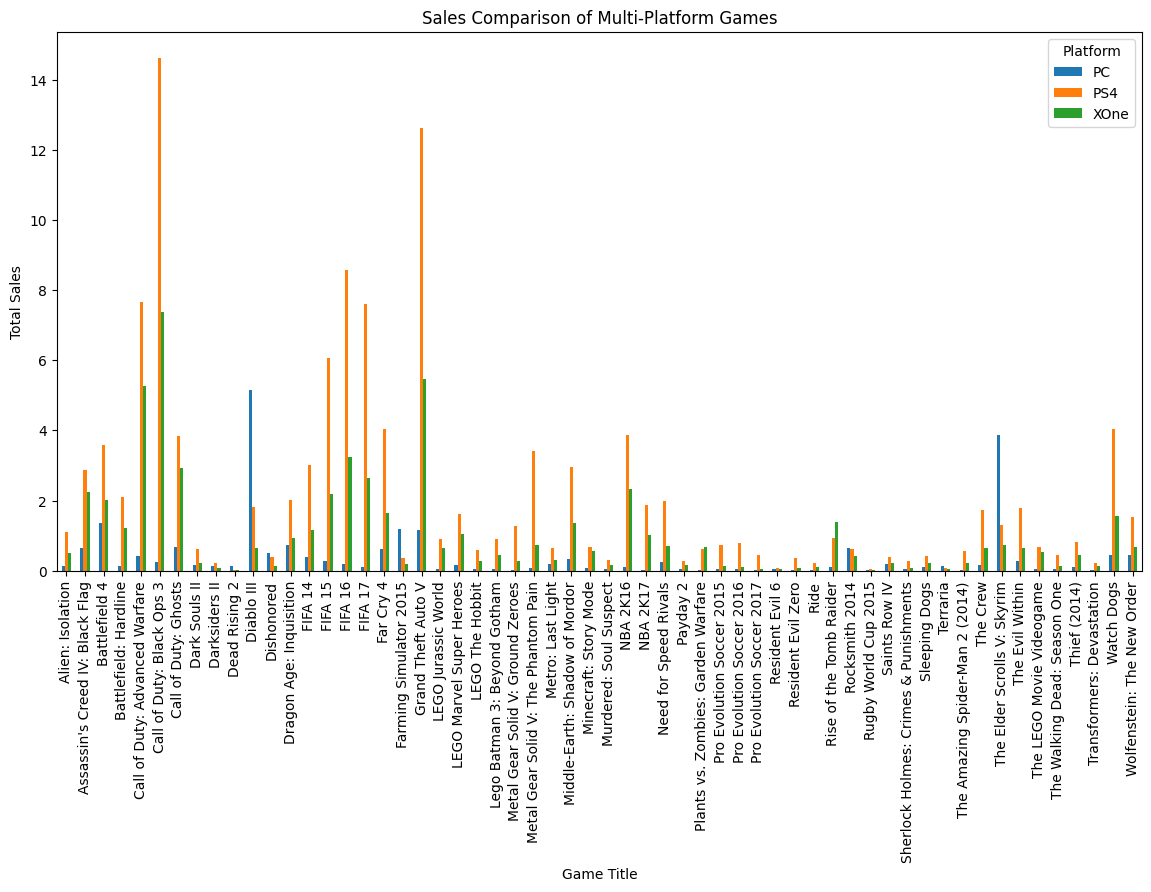

In [33]:
games_per_title = games.groupby('name')['platform'].nunique()
games_with_min_4_platforms = games_per_title[games_per_title >= 4].index

# Filtrar el DataFrame original para incluir solo estos juegos
multi_platform_games = games[games['name'].isin(games_with_min_4_platforms)]

platforms_of_interest = ['PC', 'XOne', 'PS4']

# Crear una tabla pivote para comparar las ventas
sales_comparison = multi_platform_games[multi_platform_games['platform'].isin(platforms_of_interest)].pivot_table(
    index='name', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
)

# Filtrar solo los juegos que tienen ventas en todas las plataformas de interés
sales_comparison = sales_comparison.dropna()

# Graficar las ventas de estos juegos en cada plataforma
sales_comparison.plot(kind='bar', figsize=(14, 7), title='Sales Comparison of Multi-Platform Games')
plt.xlabel('Game Title')
plt.ylabel('Total Sales')
plt.legend(title='Platform')
plt.show()

Tomando en cuenta las conclusiones se tomaron en cuenta los juegos que aparecen en minimo 4 plataformas y de ahí se revisaron sus ventas en las plataformas potenciales que se consideraron que son: 
**PC**
**PS4**
**XOne**

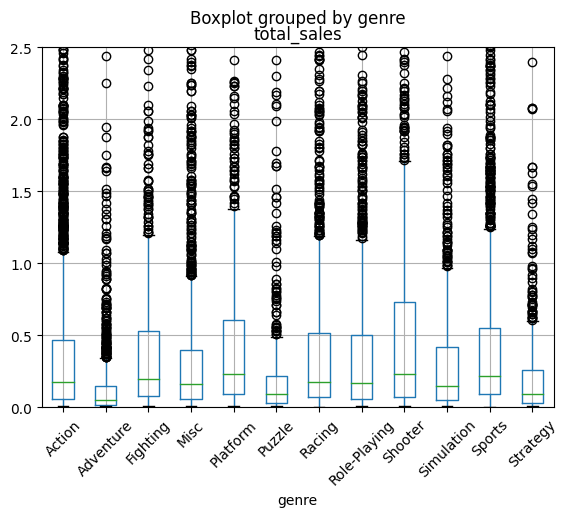

In [34]:
filtered_games.boxplot(
    column='total_sales',
    by='genre'
)
plt.ylim(0, 2.5)
plt.xticks(rotation=45)
plt.show()

Si podemos generalizar acerca de los generos con ventas altas y bajas 

In [35]:
games["rating_reduced"] = np.where(
    games['rating'].isin(['EC','K-A','RP','AO']),
    'Other',
    games['rating']
)

games["rating_reduced"].value_counts()

E        3921
T        2903
M        1535
E10+     1392
Other      13
Name: rating_reduced, dtype: int64

In [36]:
games['rating_reduced'].fillna('Unknown', inplace=True)

In [37]:
print(games['rating_reduced'].isnull().sum())

0


In [38]:
games["rating_reduced"].value_counts()

Unknown    5575
E          3921
T          2903
M          1535
E10+       1392
Other        13
Name: rating_reduced, dtype: int64

## Perfiles de usuario para cada región:


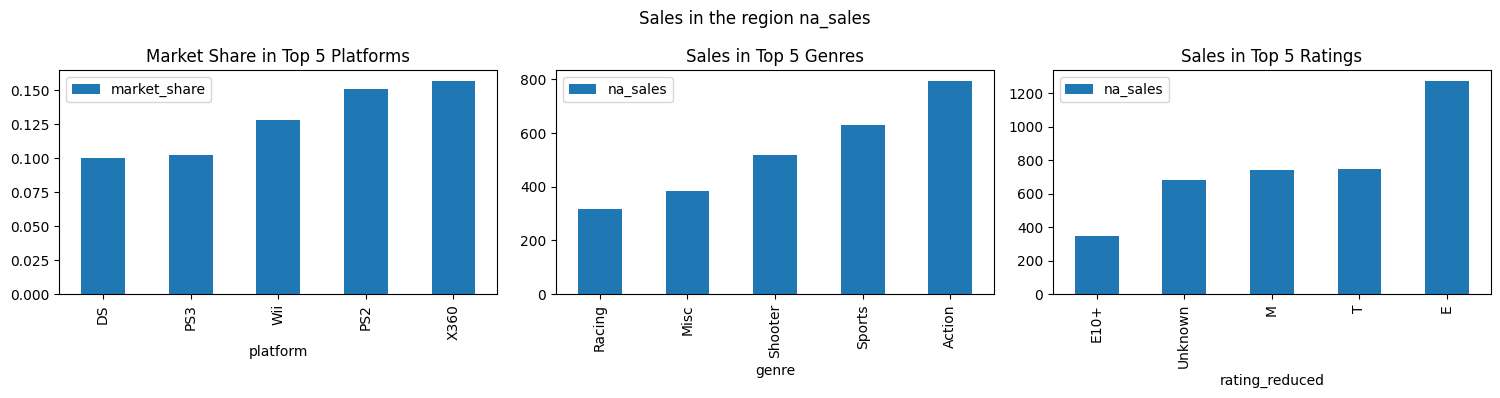

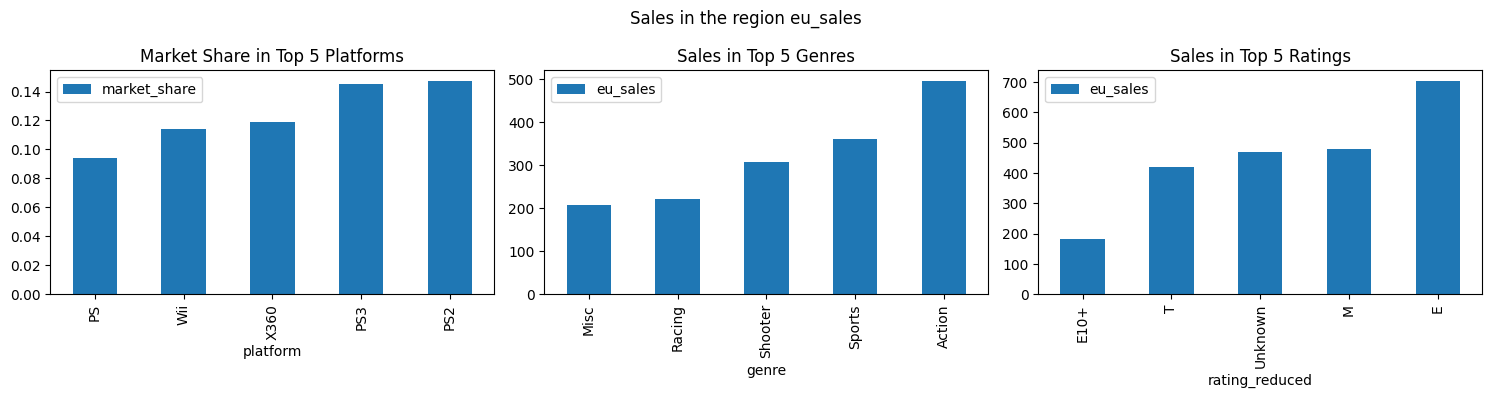

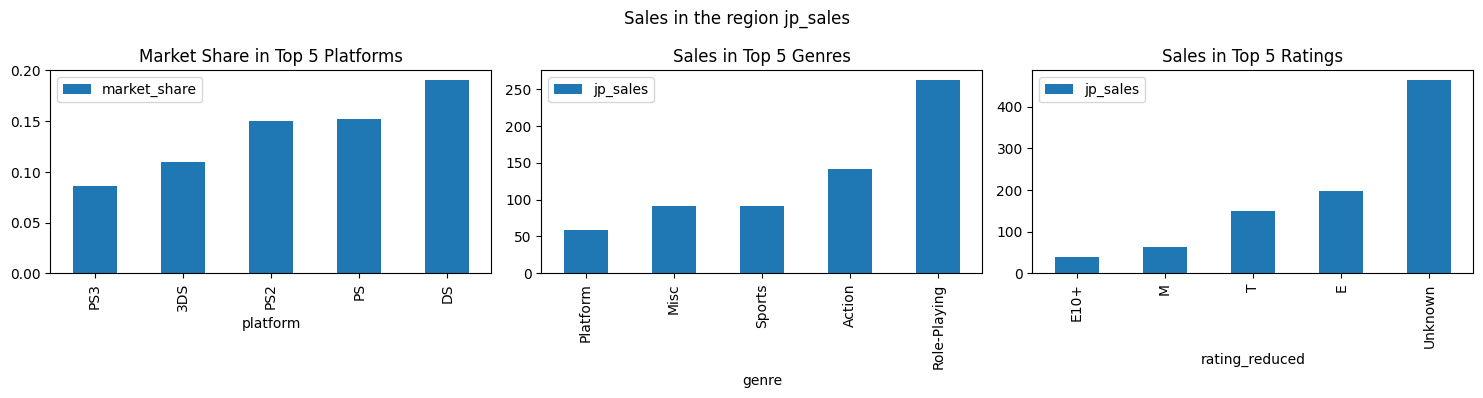

In [39]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

    sales_by_platform = games.groupby('platform')[region].sum()
    top_platforms = sales_by_platform.sort_values().tail(5).reset_index()
    top_platforms['market_share'] = top_platforms[region] / sales_by_platform.sum()

    top_5_genres = games.groupby('genre')[region].sum().sort_values().tail(5).reset_index()

    top_5_ratings = games.groupby('rating_reduced')[region].sum().sort_values().tail(5).reset_index()

    fig.suptitle(f"Sales in the region {region}", y=0.98)

    axes[0].set_title("Market Share in Top 5 Platforms")
    top_platforms.plot(kind='bar', x='platform', y='market_share', ax=axes[0])

    axes[1].set_title("Sales in Top 5 Genres")
    top_5_genres.plot(kind='bar', x='genre', y=region, ax=axes[1])
    
    axes[2].set_title("Sales in Top 5 Ratings")
    top_5_ratings.plot(kind='bar', x='rating_reduced', y=region, ax=axes[2])

    fig.tight_layout(pad=1)


De las graficas anteriores podemos observar varias cosas, dentro de las clasificaciones individuales podemos observar que en Japón no afectan dichas clasificaciones, en el caso de Europa y EU podemos observar que si influye pero el hecho de no tenga o sea desconocido la clasificación no es un factor que afecte directamente en la venta de juegos. En cuantos los generos se observa que la columna de role-playing en japón es el que tiene más ventas, algo que no sucede ni en EU y europa, por que se puede considerar un mercado diferente para la salida de un juego y por último vemos las plataformas más vendidas que como se puede obervar en japón también son diferentes ya que predominan las plataformas creadas en dicho país y sobre todo mencionar que no se consumen las plataformas de Xbox.

In [40]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'year_date', 'user_score_fixed', 'total_sales', 'rating_reduced'],
      dtype='object')

## Pruebas de Hipótesis:

**Para probar las hipótesis que has planteado, vamos a seguir un enfoque común en estadística conocido como pruebas de hipótesis, específicamente usando pruebas t de Student independientes. Aquí está cómo podríamos abordar cada una de tus hipótesis:**

### Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
**Hipótesis nula (H₀):** Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
**Hipótesis alternativa (H₁):** Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

Formulación de las hipótesis:

H₀: µ₁ = µ₂ (donde µ₁ es la media de las calificaciones para Xbox One y µ₂ es la media de las calificaciones para PC).
H₁: µ₁ ≠ µ₂ (las medias no son iguales).
Criterio de prueba:

Se utilizó una prueba t de Student para muestras independientes.
Seleccionamos un nivel de significancia, α, como el umbral para rechazar la hipótesis nula. Se usó α = 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error tipo I al rechazar incorrectamente la H₀.
Razón para la elección:

La prueba t es adecuada cuando queremos comparar las medias de dos muestras independientes y verificar si las diferencias observadas son estadísticamente significativas.
α = 0.05 es un valor estándar que equilibra la sensibilidad del test con el riesgo de error tipo I.

In [52]:
# Realizamos la prueba de Levene para verificar la igualdad de las varianzas
xbox_one_data = games[games['platform'] == 'XOne']
pc_data = games[games['platform'] == 'PC']
    
statistic, p_value = levene(
    xbox_one_data['user_score_fixed'], 
    pc_data['user_score_fixed']
)

p_value

0.08366973210716193

In [57]:
# Hipótesis 1: Calificaciones promedio de los usuarios para Xbox One y PC

statistic, p_value = ttest_ind(
    xbox_one_data['user_score_fixed'] , 
    pc_data['user_score_fixed'] ,
    equal_var=True
)

# Establecimiento del umbral alfa
alpha = 0.05

# Ponemos equal= True ya que al hacer la prueba de levene en la parte de arriba se pudo observar que las dos varianzas son
#estadisticamente iguales, es decir, las varianzas son iguales por lo que lo más en sensato es que se quede como lo hicimos 
# Resultados
print("Hipótesis 1: Calificaciones promedio de los usuarios para Xbox One y PC")
print(f"T-Statistic: {statistic}, P-Value: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son las mismas.")

Hipótesis 1: Calificaciones promedio de los usuarios para Xbox One y PC
T-Statistic: -5.95653685188429, P-Value: 3.3841648705777265e-09
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.


### Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
**Hipótesis nula (H₀):** Las calificaciones promedio de los usuarios para Acción y Deportes son iguales.
**Hipótesis alternativa (H₁):** Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.

Explicación:

Formulación de las hipótesis:

H₀: µ₁ = µ₂ (donde µ₁ es la media de las calificaciones para el género Acción y µ₂ es la media de las calificaciones para el género Deportes).
H₁: µ₁ ≠ µ₂ (las medias no son iguales).
Criterio de prueba:

Al igual que en el caso anterior, se usó una prueba t de Student para muestras independientes.
Mantendremos el mismo nivel de significancia, α = 0.05, para la prueba.
Razón para la elección:

La prueba t es apropiada para comparar las medias de dos grupos independientes (en este caso, dos géneros diferentes de juegos).
α = 0.05 es comúnmente aceptado y nos permite evaluar si las diferencias en las calificaciones entre los dos géneros son estadísticamente significativas.

In [58]:
action_scores = games[games['genre'] == 'Action']
sports_scores = games[games['genre'] == 'Sports']

statistic, p_value = levene(
    action_scores['user_score_fixed'], 
    sports_scores['user_score_fixed']
)

p_value

0.00023017310597344456

In [62]:

# Prueba t de dos muestras
statistic, p_value = ttest_ind(
    action_scores['user_score_fixed'], 
    sports_scores['user_score_fixed'],
    equal_var=True

)

# Establecimiento del umbral alfa
alpha2 = 0.05

print("\nHipótesis 2: Calificaciones promedio de los usuarios para los géneros de Acción y Deportes")
print(f"T-Statistic: {statistic}, P-Value: {p_value}")
if p_value < alpha2:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.")


Hipótesis 2: Calificaciones promedio de los usuarios para los géneros de Acción y Deportes
T-Statistic: -1.9708545682674994, P-Value: 0.04879246871478596
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


## Conclusiones:
Después del análisis realizado, se puede afirmar que existen suficientes herramientas para predecir el posible éxito comercial de un videojuego. Se identificaron varios factores clave que influyen directamente en el rendimiento de un juego en el mercado:

- **La región de lanzamiento** tiene un papel determinante. Japón presenta patrones de consumo únicos, con claras diferencias respecto a América del Norte y Europa.

- **Las plataformas actuales con mayores ventas** (como PS4, Xbox One y PC) ofrecen las mejores oportunidades de éxito. En particular, la PC demuestra ser una plataforma estable y con futuro, a diferencia de otras consolas que podrían estar en declive.

- **Los géneros “Action” y “Sports”** destacan por su alto rendimiento en ventas, especialmente en los mercados de Estados Unidos y Europa.

- **El impacto de las calificaciones de usuarios** es especialmente relevante en estos géneros. Una buena recepción por parte de los jugadores puede aumentar significativamente las ventas de un título.

Estos factores en conjunto permiten construir una estrategia sólida para predecir el éxito de futuros lanzamientos, optimizando la inversión y planificación de marketing de la empresa.